# Homework:
1. Отрисовать  
2. Избавиться от выбросов
3. Отнормировать (поделить на max)
4. Матрица корреляции
5. Понизить размерность

In [84]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=a3217026d9731225e50d59c5e7d92900cfe724e906595e6a5577d7c1d1123d87
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [86]:
import numpy as np
import pandas as pd
import pylab as plt
import plotly.graph_objects as go
import os
import seaborn as sns

In [3]:
df = pd.read_csv('attributes.csv')

In [4]:
df

,X,Y,Elev,V0,fact_ampl_pp_gr,fact_ampl_pp_mk,fact_ampl_pp_si,fact_ampl_pv_gr,fact_ampl_pv_mk,fact_ampl_pv_si,fact_freq_pp_gr,fact_freq_pp_mk,fact_freq_pp_si,fact_freq_pv_gr,fact_freq_pv_mk,fact_freq_pv_si
0,16150.04,17986.10,120.196317,1.384615,284.222090,1.263407,128.907331,273.690278,0.831353,204.348703,8.548696,6.568408,11.996490,10.265258,6.544156,14.080112
1,16100.66,17978.20,107.691602,1.384615,121.116506,0.474654,5.883812,226.122562,0.888885,216.866621,6.720315,1.564980,15.489440,11.086243,5.267542,14.642377
2,16051.08,17970.41,107.542895,1.384615,129.088820,0.439749,16.006177,251.086520,0.857030,218.860654,6.991201,1.617356,15.545039,12.472042,4.513891,14.664633
3,16001.70,17962.51,107.394356,1.285714,138.807711,0.391217,25.677526,260.215629,0.755396,205.086313,7.164131,1.653167,15.596579,13.653929,4.532095,14.609539
4,15952.72,17954.81,107.262991,1.285714,149.339632,0.327025,33.080279,250.405839,0.789063,203.922969,7.172312,1.667173,15.658531,11.179142,4.813766,14.357159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17041,16940.62,5966.41,126.919114,0.696429,263.354696,0.294337,9.028008,51.572902,1.429354,109.946778,1.566024,1.775867,9.069239,12.614860,10.079869,15.106354
17042,16891.54,5958.71,126.886749,0.629032,272.402869,0.275335,1.570021,15.672051,1.449612,111.585244,1.509666,1.981423,9.379994,12.260071,10.116983,15.802101
17043,16595.46,5911.83,127.149730,0.527027,248.416750,0.221825,62.808419,33.361552,1.777707,108.092136,3.471502,3.472866,6.565022,10.142469,10.494725,15.658013
17044,18214.91,4953.52,126.404079,1.218750,205.526961,0.042533,20.983285,253.511410,0.269825,212.383686,5.371321,2.155317,6.088115,9.588601,8.847043,15.906009


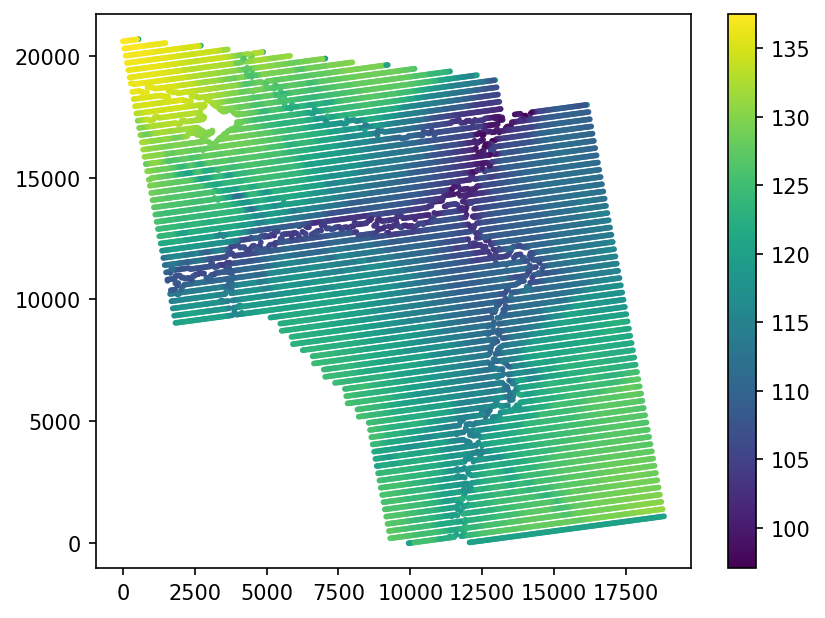

In [5]:
fig = plt.figure(dpi=150)
plt.scatter(df.X, df.Y, c=df.Elev, s=3)
plt.colorbar()

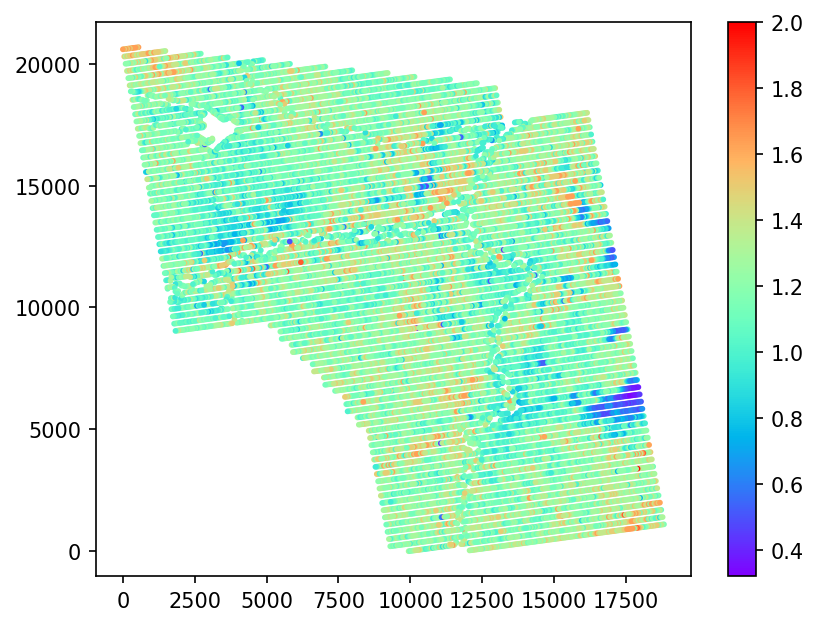

In [7]:
fig = plt.figure(dpi=150)
plt.scatter(df.X, df.Y, c=df.V0, s=3, cmap='rainbow')
plt.colorbar()

In [6]:
df.describe()

,X,Y,Elev,V0,fact_ampl_pp_gr,fact_ampl_pp_mk,fact_ampl_pp_si,fact_ampl_pv_gr,fact_ampl_pv_mk,fact_ampl_pv_si,fact_freq_pp_gr,fact_freq_pp_mk,fact_freq_pp_si,fact_freq_pv_gr,fact_freq_pv_mk,fact_freq_pv_si
count,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000,17046.000000
mean,10079.257772,11000.065603,118.577818,1.187334,297.553583,1.486119,134.277814,301.403800,1.907962,165.562174,8.124070,6.433913,11.732677,8.914612,8.260683,15.114040
std,4645.803299,5395.438863,8.025273,0.184249,148.394561,1.931546,69.244866,128.800872,1.734023,54.793411,3.008022,3.409650,2.720202,2.605531,3.261328,1.868319
min,0.000000,0.000000,97.034797,0.319672,0.159521,0.000131,0.002626,0.153293,0.000202,4.626388,0.003252,0.000446,2.217792,0.571090,0.002566,7.915195
25%,6519.890000,6782.155000,111.857142,1.058824,198.041070,0.403249,87.899770,211.201723,0.632853,127.766833,6.024848,4.141245,9.821538,7.111373,6.147358,13.824846
50%,10499.700000,11460.310000,119.497865,1.200000,275.646184,0.918984,127.502542,286.783214,1.448790,162.162419,8.107320,5.958225,11.816395,8.812072,8.972977,15.107784
75%,13887.615000,15505.140000,124.732741,1.285714,372.212388,1.839117,170.213639,374.685796,2.690147,202.422805,10.167639,8.181629,13.651900,10.659438,10.374452,16.328046
max,18824.370000,20675.620000,137.485739,2.000000,1064.210905,25.413900,510.457924,940.916155,13.668805,408.372080,19.776345,27.414433,22.434330,18.867420,26.536189,22.011933


# Убираем выбросы

In [40]:
attributes = df.drop(columns=["X", "Y"]).columns.values

def show_all(data, nrows=3, ncols=5, attributes=attributes ):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 17), sharey=False)
    for i in range(nrows):
      for j in range (ncols):
        if (i*ncols+j<len(attributes)):
          sns.stripplot(y = attributes[i*ncols+j], data = data, ax = axes[i,j], color = '#26fe3c')


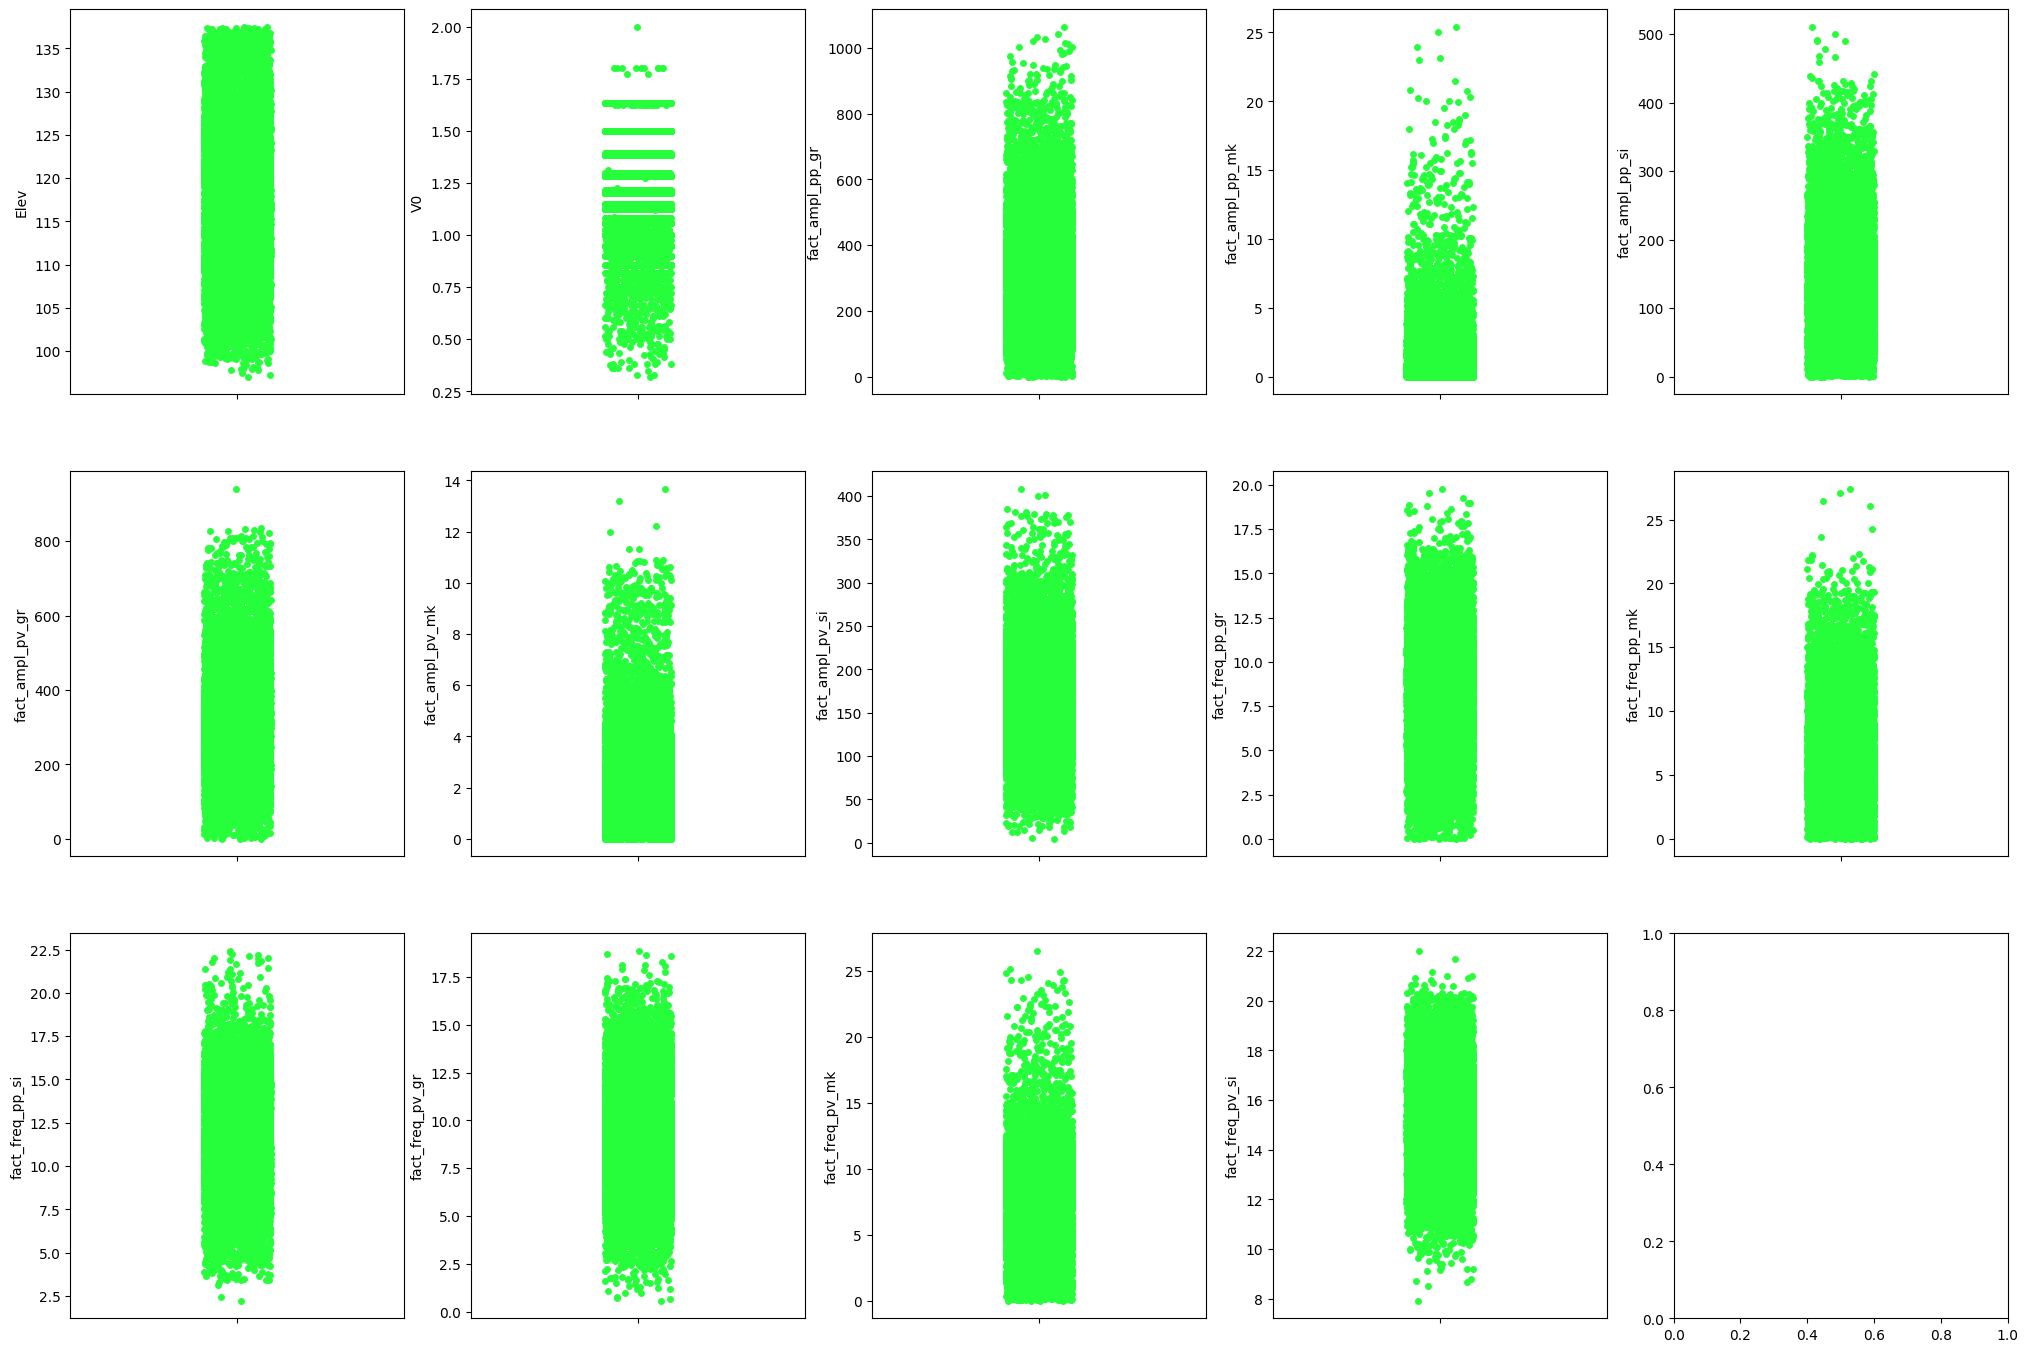

In [41]:
show_all(df)

In [42]:
def filtered(df, attributes, n=3):
    for attribute in attributes:
        mean = df[attribute].mean()
        sigma = df[attribute].std()
        df = df[(df[attribute] <= mean+(n*sigma)) & (df[attribute] >= mean-(n*sigma))]
    return df

df_filtered = filtered(df, attributes, 3)
df_filtered.describe()

,X,Y,Elev,V0,fact_ampl_pp_gr,fact_ampl_pp_mk,fact_ampl_pp_si,fact_ampl_pv_gr,fact_ampl_pv_mk,fact_ampl_pv_si,fact_freq_pp_gr,fact_freq_pp_mk,fact_freq_pp_si,fact_freq_pv_gr,fact_freq_pv_mk,fact_freq_pv_si
count,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000
mean,10046.699464,11155.883929,118.598706,1.195050,284.043963,1.228903,128.164769,297.298811,1.769754,164.143010,8.165724,6.240980,11.758588,8.925346,8.180460,15.145174
std,4568.031945,5368.090580,7.886988,0.172148,131.432108,1.197102,60.283290,119.943325,1.428060,52.977417,2.904866,3.044615,2.632653,2.552511,3.069636,1.848600
min,0.000000,0.000000,97.204963,0.642857,0.159521,0.000131,0.002626,0.681348,0.000202,4.626388,0.003252,0.000446,3.749578,1.178359,0.002566,9.583894
25%,6610.350000,7138.940000,111.932167,1.058824,193.784792,0.382034,86.510045,212.043528,0.623030,127.458266,6.116517,4.158232,9.903945,7.139171,6.132864,13.865285
50%,10446.520000,11628.840000,119.474200,1.200000,269.859197,0.854998,124.247511,285.774198,1.422031,161.462910,8.162569,5.896299,11.862700,8.820619,8.933525,15.137940
75%,13796.080000,15618.750000,124.473395,1.285714,358.653589,1.667899,163.312384,369.563770,2.604179,201.060246,10.171629,7.983506,13.642527,10.661499,10.327998,16.350165
max,18824.370000,20675.620000,137.485739,1.636364,742.353315,7.035631,326.081770,684.840864,7.039437,327.546247,17.063824,16.264441,19.814792,16.696597,17.886271,20.672319


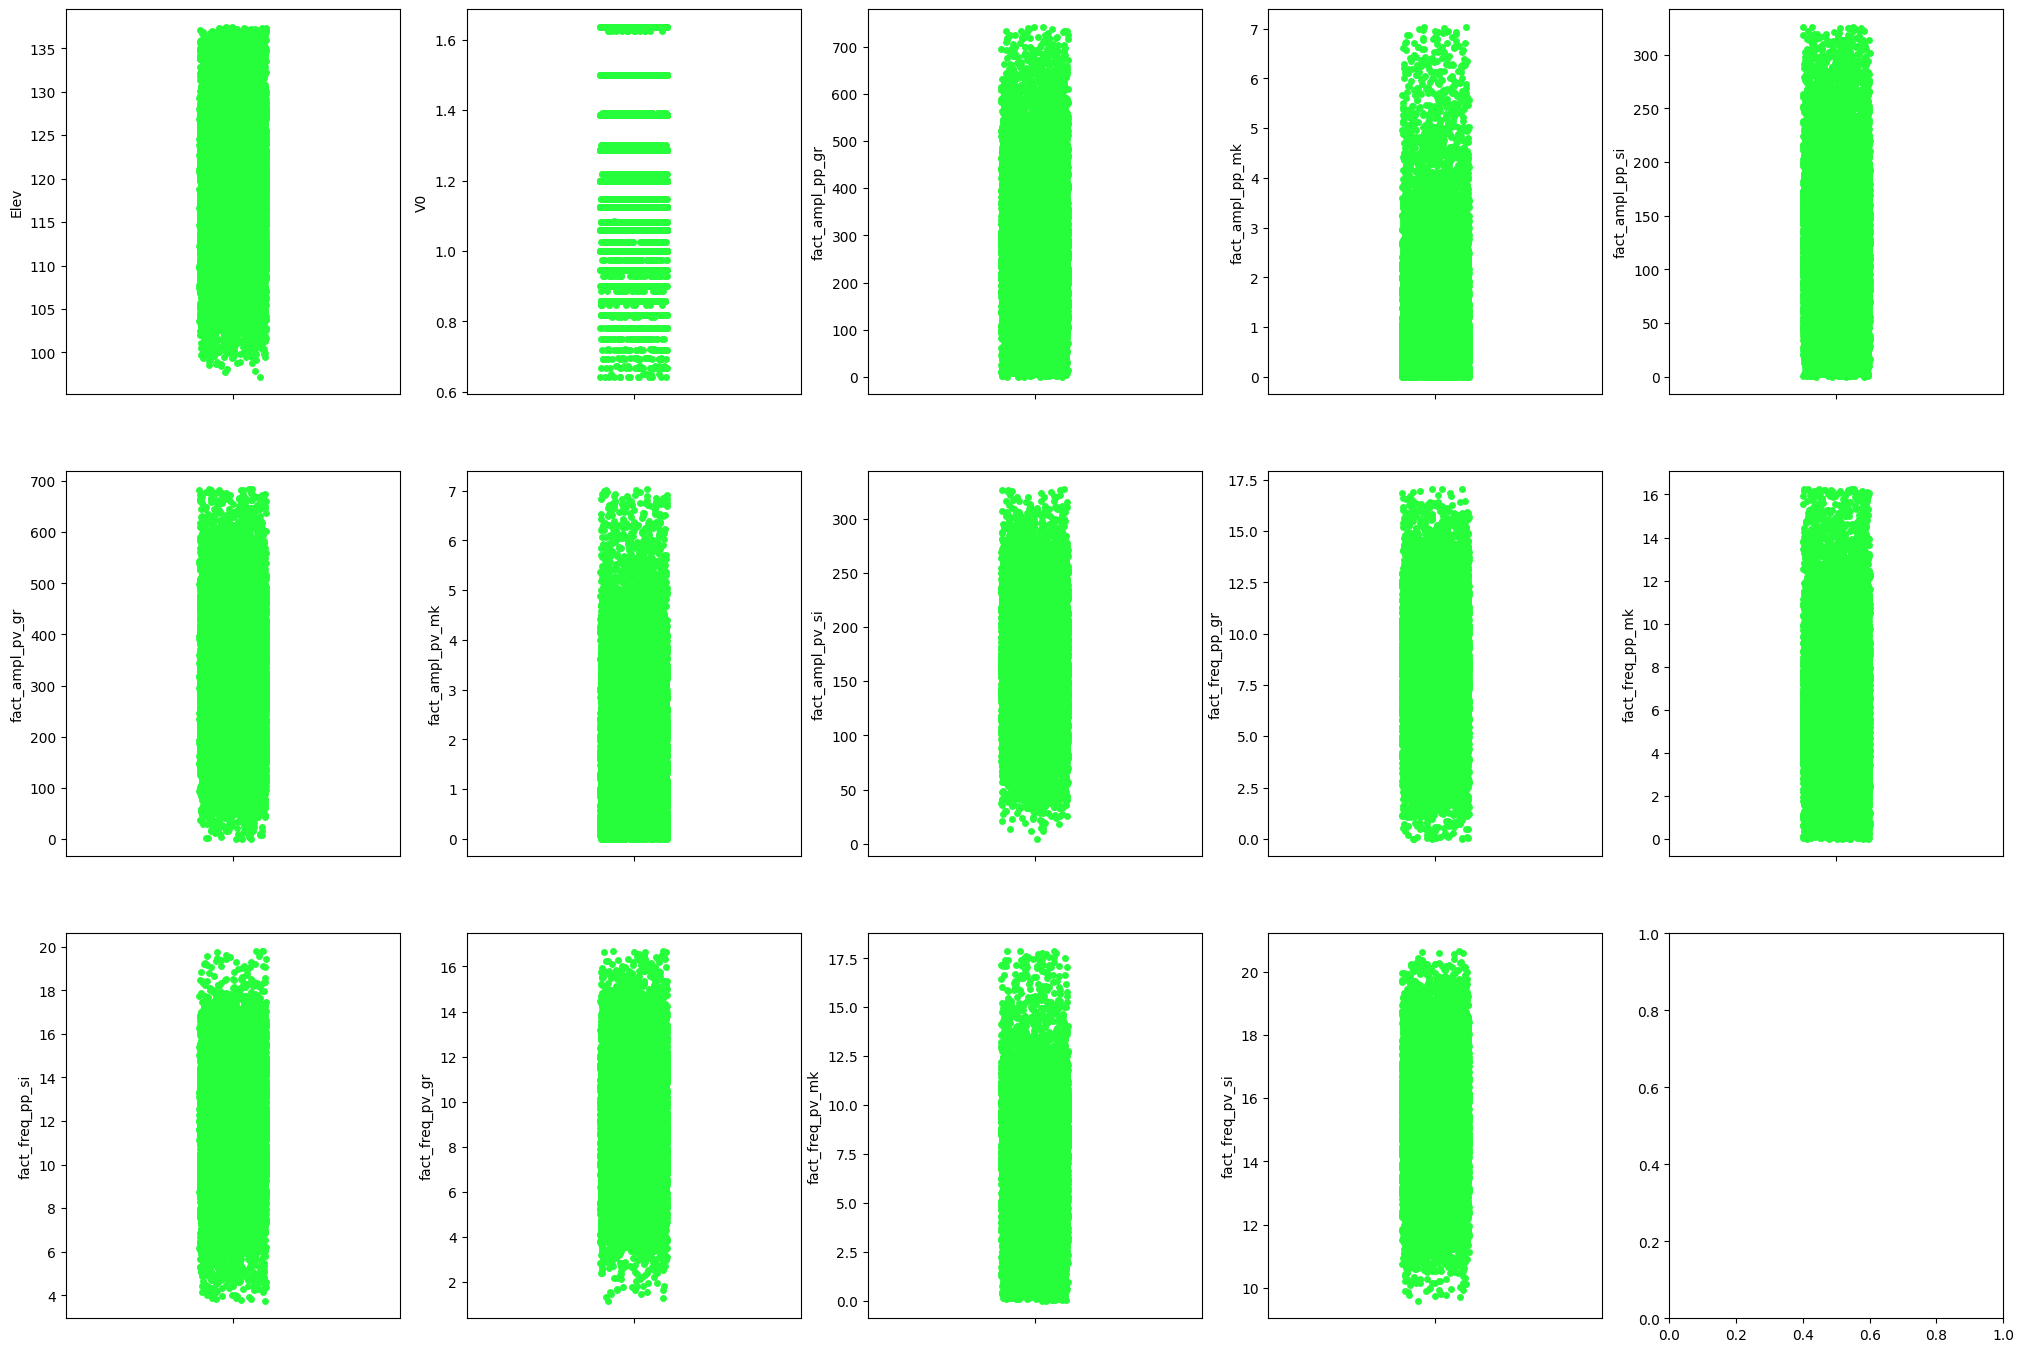

In [43]:
show_all(df_filtered)

# Нормирование

In [47]:
df_normalization =df_filtered.iloc[:, 2:] / df_filtered.iloc[:, 2:].max()
df_normalization=pd.concat((df_filtered[["X", "Y"]],df_normalization),axis=1)
df_normalization

,X,Y,Elev,V0,fact_ampl_pp_gr,fact_ampl_pp_mk,fact_ampl_pp_si,fact_ampl_pv_gr,fact_ampl_pv_mk,fact_ampl_pv_si,fact_freq_pp_gr,fact_freq_pp_mk,fact_freq_pp_si,fact_freq_pv_gr,fact_freq_pv_mk,fact_freq_pv_si
0,16150.04,17986.10,0.874246,0.846154,0.382866,0.179573,0.395322,0.399641,0.118099,0.623877,0.500984,0.403851,0.605431,0.614811,0.365876,0.681109
1,16100.66,17978.20,0.783293,0.846154,0.163152,0.067464,0.018044,0.330183,0.126272,0.662095,0.393834,0.096221,0.781711,0.663982,0.294502,0.708308
2,16051.08,17970.41,0.782211,0.846154,0.173891,0.062503,0.049086,0.366635,0.121747,0.668182,0.409709,0.099441,0.784517,0.746981,0.252366,0.709385
3,16001.70,17962.51,0.781131,0.785714,0.186983,0.055605,0.078746,0.379965,0.107309,0.626129,0.419843,0.101643,0.787118,0.817767,0.253384,0.706720
4,15952.72,17954.81,0.780175,0.785714,0.201171,0.046481,0.101448,0.365641,0.112092,0.622578,0.420323,0.102504,0.790245,0.669546,0.269132,0.694511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17030,17550.08,2116.05,0.938469,0.785714,0.427594,0.021645,0.622071,0.515782,0.440437,0.618719,0.433915,0.515366,0.548032,0.446369,0.544414,0.704980
17033,17500.70,2108.15,0.938137,0.785714,0.432608,0.008089,0.621700,0.727509,0.503610,0.920997,0.400727,0.539425,0.545092,0.580401,0.457165,0.641791
17041,16940.62,5966.41,0.923144,0.425595,0.354757,0.041835,0.027686,0.075306,0.203049,0.335668,0.091774,0.109187,0.457700,0.755535,0.563553,0.730753
17044,18214.91,4953.52,0.919398,0.744792,0.276859,0.006045,0.064350,0.370176,0.038331,0.648408,0.314778,0.132517,0.307251,0.574285,0.494628,0.769435


In [48]:
df_normalization.describe()

,X,Y,Elev,V0,fact_ampl_pp_gr,fact_ampl_pp_mk,fact_ampl_pp_si,fact_ampl_pv_gr,fact_ampl_pv_mk,fact_ampl_pv_si,fact_freq_pp_gr,fact_freq_pp_mk,fact_freq_pp_si,fact_freq_pv_gr,fact_freq_pv_mk,fact_freq_pv_si
count,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000,15201.000000
mean,10046.699464,11155.883929,0.862626,0.730308,0.382626,0.174669,0.393045,0.434114,0.251406,0.501129,0.478540,0.383719,0.593425,0.534561,0.457360,0.732631
std,4568.031945,5368.090580,0.057366,0.105202,0.177048,0.170149,0.184872,0.175140,0.202866,0.161740,0.170235,0.187195,0.132863,0.152876,0.171620,0.089424
min,0.000000,0.000000,0.707019,0.392857,0.000215,0.000019,0.000008,0.000995,0.000029,0.014124,0.000191,0.000027,0.189231,0.070575,0.000143,0.463610
25%,6610.350000,7138.940000,0.814137,0.647059,0.261041,0.054300,0.265302,0.309625,0.088506,0.389131,0.358449,0.255664,0.499826,0.427582,0.342881,0.670717
50%,10446.520000,11628.840000,0.868993,0.733333,0.363519,0.121524,0.381032,0.417286,0.202009,0.492947,0.478355,0.362527,0.598679,0.528288,0.499463,0.732281
75%,13796.080000,15618.750000,0.905355,0.785714,0.483131,0.237065,0.500833,0.539635,0.369941,0.613838,0.596093,0.490856,0.688502,0.638543,0.577426,0.790921
max,18824.370000,20675.620000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


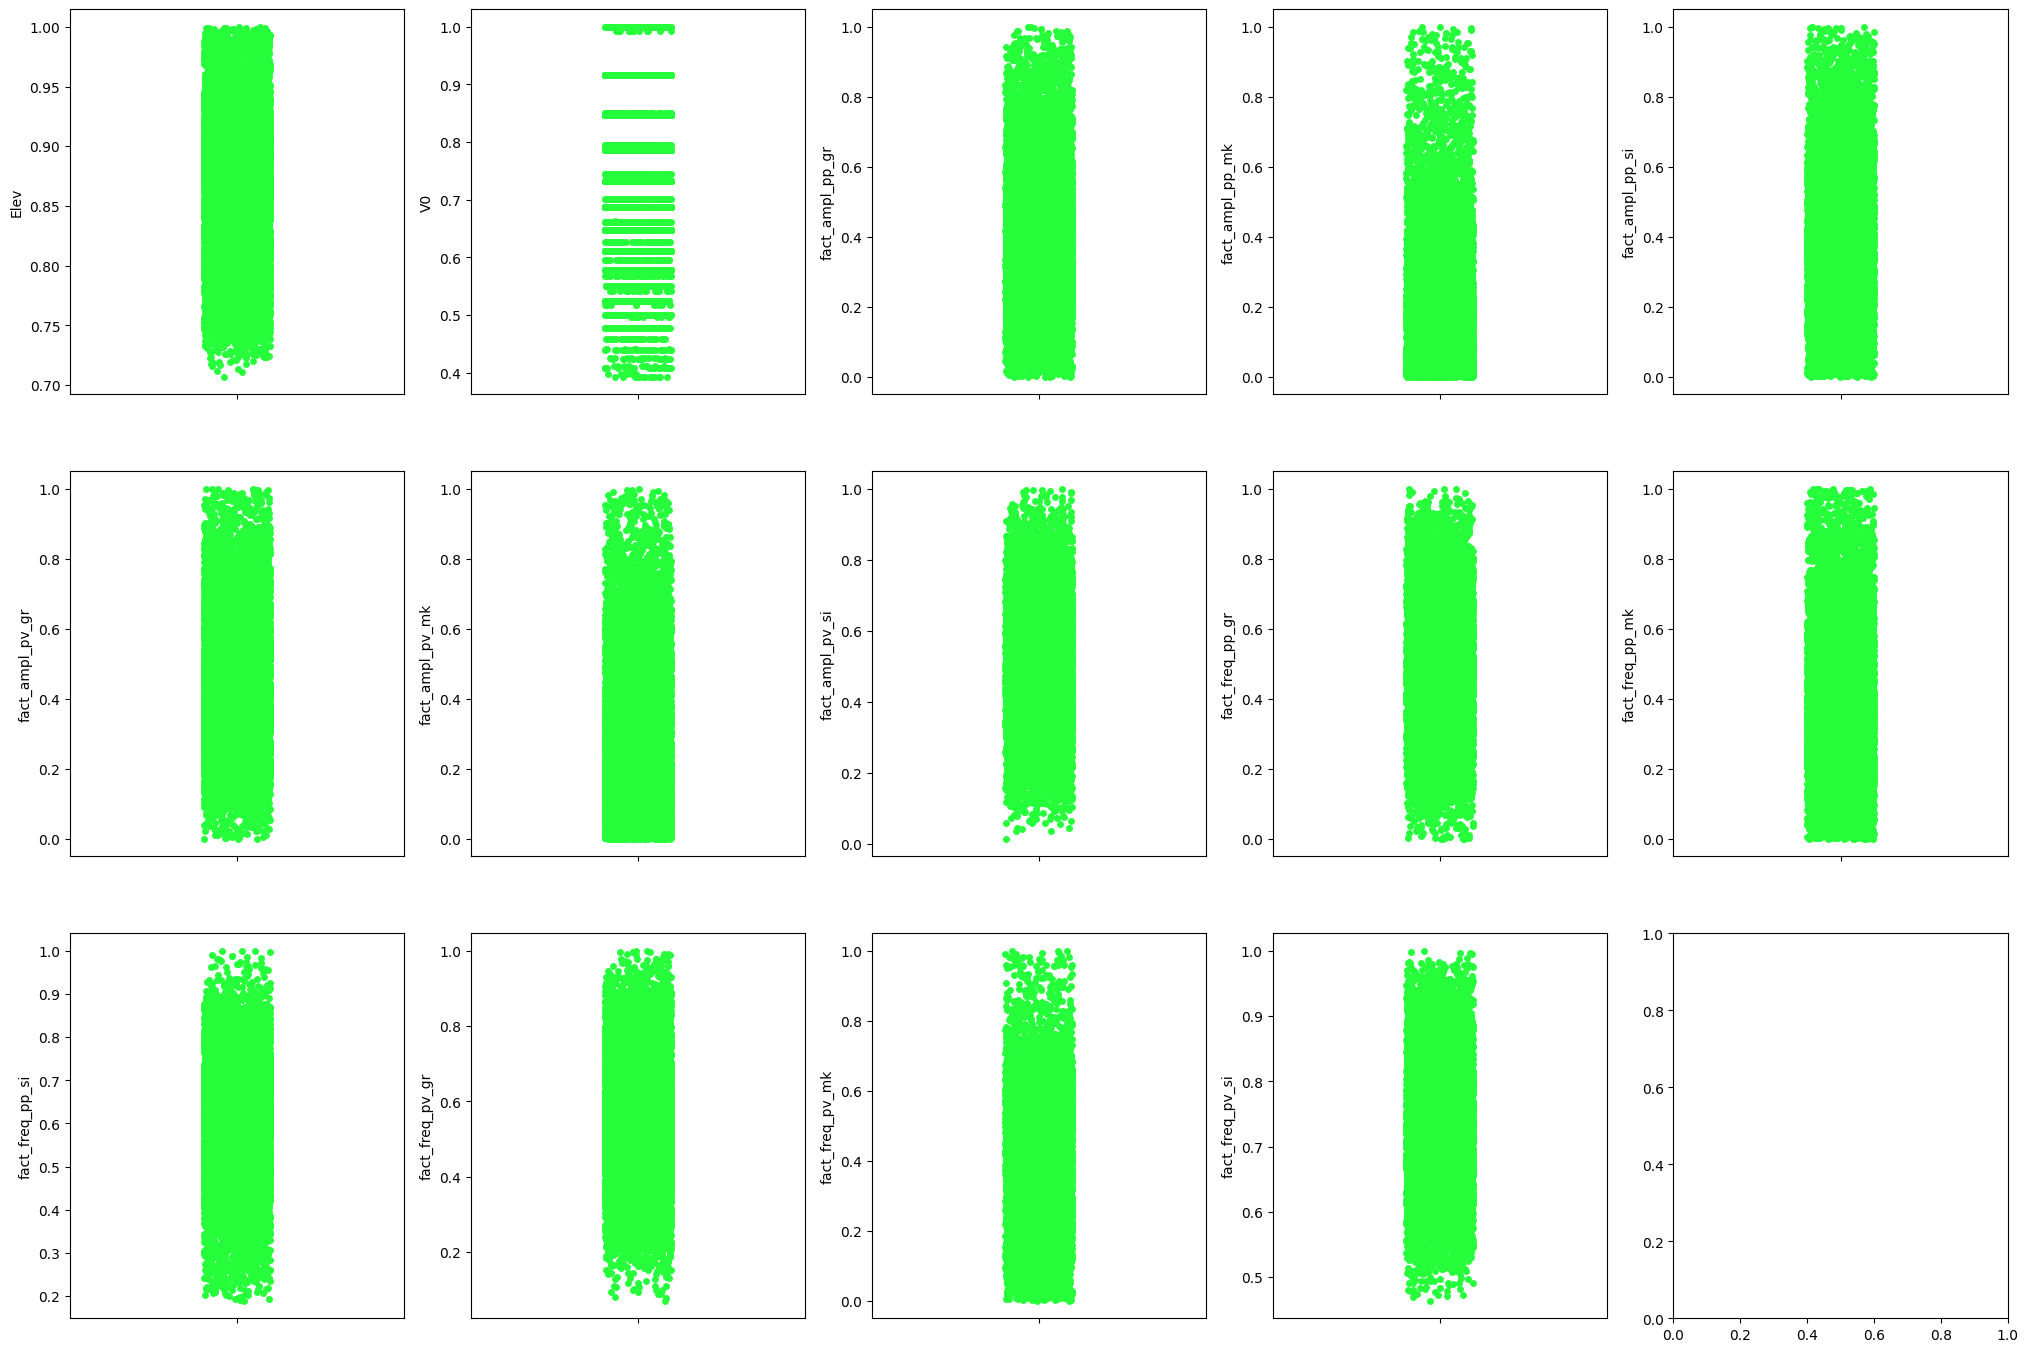

In [49]:
show_all(df_normalization)

# Матрица корреляции

<Axes: >

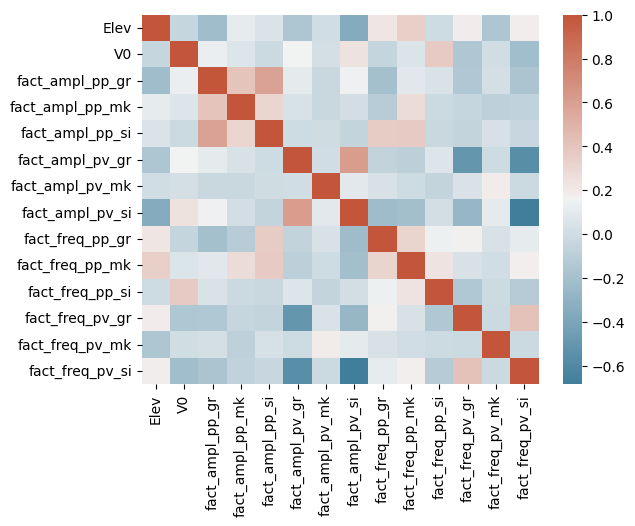

In [54]:
sns.heatmap(df_normalization.iloc[:,2:].corr(), cmap = sns.diverging_palette(230, 20, as_cmap=True))

In [79]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.graph_objects as go

# Метод главных компонент (PCA)

In [72]:
X_centered = (df_normalization.iloc[:,2:] - df_normalization.iloc[:,2:].mean())

Text(0, 0.5, 'Y')

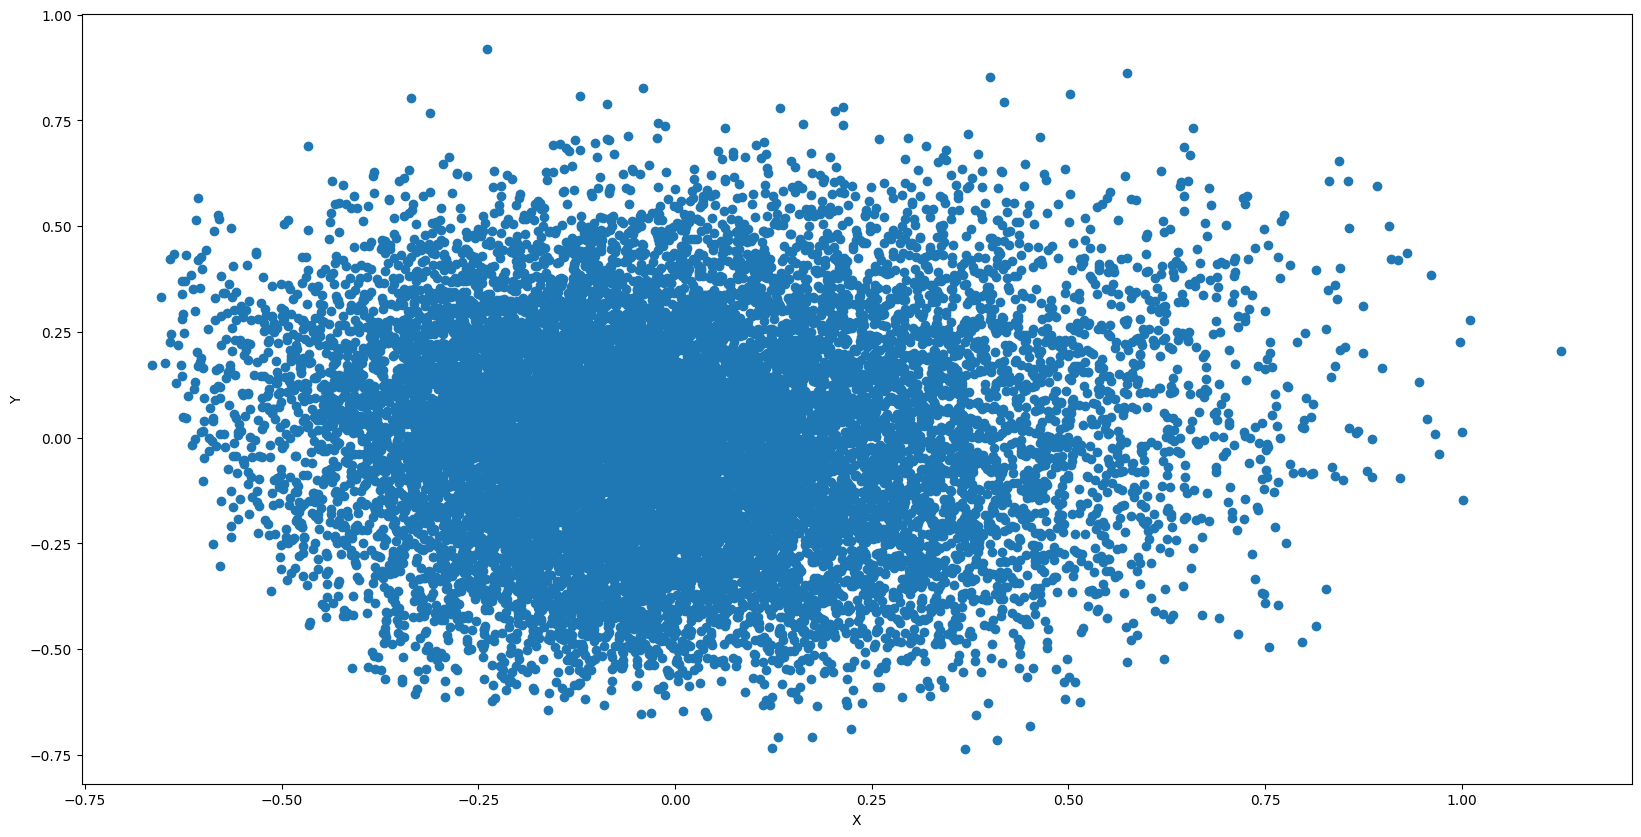

In [75]:
fig = plt.figure(figsize=(20,10))
X_2 = PCA(n_components=2).fit_transform(X_centered)
plt.scatter(X_2[:,0], X_2[:,1])
plt.xlabel('X')
plt.ylabel('Y')

In [70]:
X_3 = PCA(n_components=3).fit_transform(X_centered)
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=X_3[:, 0], y=X_3[:, 1], z=X_3[:, 2], mode='markers'))

# t-SNE

Text(0.5, 1.0, '2D')

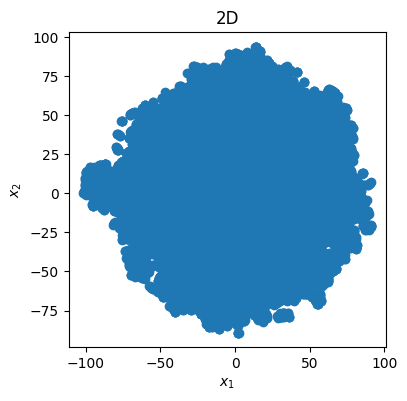

In [82]:
fig = plt.figure(figsize=(9,9))
X_2 = TSNE(n_components=2).fit_transform(X_centered)
fig.add_subplot(221)
plt.scatter(X_2[:,0], X_2[:,1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('2D')

In [83]:
X_3 = TSNE(n_components=3).fit_transform(X_centered)
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=X_3[:, 0], y=X_3[:, 1], z=X_3[:, 2], mode='markers'))
fig.update_traces(marker_size = 1)

# UMAP

In [92]:
import umap
from tqdm.notebook import tqdm
import ipywidgets as ipw

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2433: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



Text(0.5, 1.0, '2D')

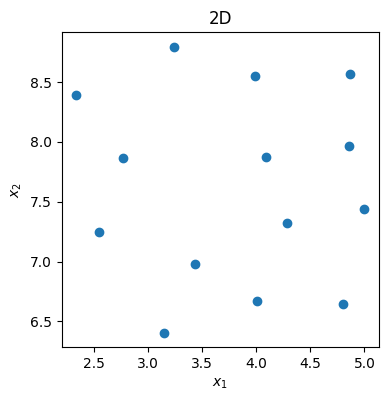

In [99]:
fig = plt.figure(figsize=(9,9))
X_2 = umap.UMAP(n_components=2).fit_transform(X_centered.T)
fig.add_subplot(221)
plt.scatter(X_2[:,0], X_2[:,1])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('2D')

In [91]:
n_neighbors_array = np.arange(2, 30, 5)
min_dists = np.linspace(0, 1, len(n_neighbors_array))
umap_results = []
for n_neighbors in tqdm(n_neighbors_array):
  umap_results_ = []
  for min_dist in min_dists:
    X_ = umap.UMAP(n_components=1, n_neighbors=n_neighbors, min_dist=min_dist).fit_transform(X_centered.T)
    umap_results_.append(X_)
  umap_results.append(umap_results_)

  0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2433: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2433: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2433: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2433: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2433: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2433: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2433: UserWarning:

n_neighbors is larger than the d

In [93]:
neighbors_slider = ipw.IntSlider(min=0, max=len(n_neighbors_array) - 1, step=1)
min_dists_slider = ipw.IntSlider(min=0, max=len(min_dists) - 1, step=1)

In [97]:
def plot(ind_neighbor, ind_min_dist):
  fig = plt.figure(figsize=(9,4))

  data_plot = umap_results[ind_neighbor][ind_min_dist]

  plt.scatter(np.arange(len(data_plot[:,0])), data_plot[:,0])
  plt.title('UMAP result')

  fig.suptitle('UMAP: n_neighbors={}; min_dists={}'.format(n_neighbors_array[ind_neighbor], min_dists[ind_min_dist]))

  fig.tight_layout()
  plt.show()


In [96]:
ipw.interact(plot, ind_neighbor=neighbors_slider, ind_min_dist=min_dists_slider)

interactive(children=(IntSlider(value=0, description='ind_neighbor', max=5), IntSlider(value=0, description='i…

<function __main__.plot(ind_neighbor, ind_min_dist)>